In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [2]:
# Get attendees to get their own key.
quandl.ApiConfig.api_key = 'gYyp7CLTPWqhbsyFNAN2'

In [3]:
# Select a basket of stocks to work with. They can pick their own.
selected = ['CNP', 'F', 'WMT',  'GE', 'TSLA']

In [45]:
# Get the data from Quandl for these stock
data = quandl.get_table('WIKI/PRICES', ticker=selected,
                        qopts={ 'columns': ['ticker', 'date', 'adj_close']},
                        date ={ 'gte': '2014-1-1', 'lte': '2016-12-31'}, 
                        paginate=True)
data

,ticker,date,adj_close
None,,,
0,WMT,2016-12-30,67.742045
1,WMT,2016-12-29,67.879254
2,WMT,2016-12-28,67.928257
3,WMT,2016-12-27,68.310482
4,WMT,2016-12-23,68.153672
...,...,...,...
3775,CNP,2014-01-08,19.132992
3776,CNP,2014-01-07,19.334039
3777,CNP,2014-01-06,19.132992


In [14]:
# Wrangling the data
clean = data.set_index('date')

table = clean.pivot(columns='ticker')
table

adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2014-01-02  19.116238  12.726742  24.266002  150.10  71.343743
2014-01-03  19.107861  12.784441  24.248354  149.56  71.108673
2014-01-06  19.132992  12.842140  24.054226  147.00  70.710863
2014-01-07  19.334039  12.677286  24.080698  149.36  70.927850
2014-01-08  19.132992  12.809169  24.010106  151.28  70.367299
...               ...        ...        ...     ...        ...
2016-12-23  23.895555  11.800021  31.055560  213.34  68.153672
2016-12-27  23.828189  11.733729  31.075043  219.53  68.310482
2016-12-28  23.520232  11.601144  30.880215  219.74  67.928257
2016-12-29  23.799318  11.582204  30.889956  214.68  67.879254
2016-12-30  23.712705  11.487500  30.782801  213.69  67.742045

[756 rows x 5 columns]

In [48]:
# Calculate the daily annual returns for the stocks.
# 250 is a good approximation of a trading year

returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250 
returns_annual
# print(returns_daily)


           ticker
adj_close  CNP       0.091859
           F        -0.007358
           GE        0.095399
           TSLA      0.204873
           WMT      -0.000943
dtype: float64

In [18]:
# Get the daily covariance of returns of the stock.
# This is effectively, how much does one stock deviate from the mean.
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250
cov_annual

adj_close                                        
ticker                 CNP         F        GE      TSLA       WMT
          ticker                                                  
adj_close CNP     0.040941  0.014076  0.015147  0.017508  0.010534
          F       0.014076  0.052813  0.021476  0.029219  0.011608
          GE      0.015147  0.021476  0.033564  0.022247  0.010747
          TSLA    0.017508  0.029219  0.022247  0.176760  0.012628
          WMT     0.010534  0.011608  0.010747  0.012628  0.032357

In [19]:
# Now calculate the efficient frontier - over 50,000 permutations of the stocks

port_returns = []
port_volatility = []
stock_weights = []

In [21]:

num_assets = len(selected)
num_portfolios = 50000
# Set a random seed, for reprodicibility
np.random.seed(101)

In [22]:
for p in range(num_portfolios):
    
    # Calculate a random weight, and make it a percentage of 
    # all the weights calculated for this basket.
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate the returns for this weighting of stocks, 
    # using the annual returns
    returns = np.dot(weights, returns_annual)
    
    # Calculate the volatility for this weighting of stocks, 
    # using the annual coveriance values
    # Effictively std. deviation
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    # Store the values for this portfolio
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [49]:
# Add a dictionary for Returns and Risk values of each portfolio
portfolio = { 'Returns': port_returns, 'Volatility': port_volatility }
print(portfolio)

{'Returns': [0.04078763273683848, 0.10429121855522497, 0.07949394389333056, 0.11814712693232406, 0.05825312277224109, 0.0868567234767276, 0.05493870714443161, 0.06108983212515527, 0.13188287605608334, 0.07789786301338683, 0.05289841925909745, 0.03152630193482479, 0.06927383683208116, 0.04368015528121342, 0.06786696456994483, 0.09734389474094436, 0.064355136828299, 0.02807365431317904, 0.08218917249338142, 0.08597960392723246, 0.055994887074258676, 0.12406184715335204, 0.05605635793595152, 0.10153602090522738, 0.06588114523846199, 0.07515190524206085, 0.13069088469202786, 0.10795046773385038, 0.10101215091163311, 0.04916843177083525, 0.09055949688667325, 0.04409548311430472, 0.05006606041602947, 0.05133464830193736, 0.08253057620008761, 0.08037925239254354, 0.07084816484212686, 0.08443930456102872, 0.06656890096735062, 0.06167778493108232, 0.048199523857966914, 0.06886466067492385, 0.08224591131914046, 0.0730466870832049, 0.03830771729894304, 0.08523914750663678, 0.09814756002317883, 0.

In [51]:
# Extend the dictionary, to accomdate each ticker and weight in the portfolio
for counter, symbol in enumerate(selected):
    portfolio[symbol + ' Weight'] = [Weight[counter] for Weight in stock_weights]

In [25]:
# Finally! Make a DataFrame...
df = pd.DataFrame(portfolio)
                                     
# What's our data look like?
df.head()

,Returns,Volatility,CNP Weight,F Weight,WMT Weight,GE Weight,TSLA Weight
0,0.040788,0.149496,0.261820,0.289335,0.014437,0.086964,0.347444
1,0.104291,0.176221,0.283065,0.104199,0.303335,0.244927,0.064474
2,0.079494,0.176328,0.195196,0.124019,0.064062,0.276685,0.340038
3,0.118147,0.206389,0.120722,0.043415,0.313581,0.378758,0.143523
4,0.058253,0.159980,0.434703,0.328493,0.030755,0.087453,0.118597


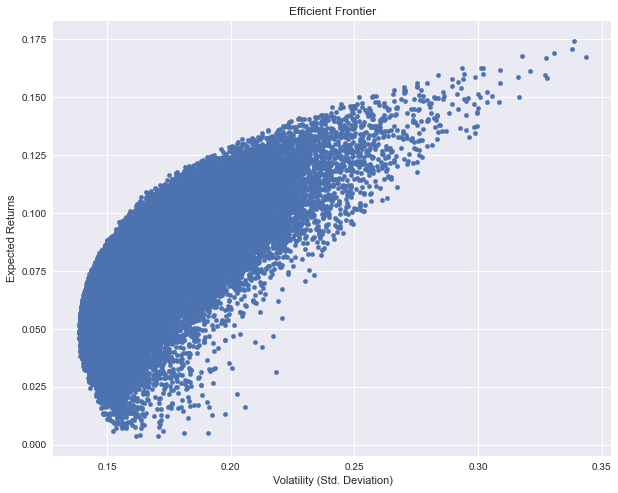

In [53]:
# Visualize the frontier!
# Use a scatter plot, and use seaborn colour styling...
plt.style.use('seaborn')
df.plot.scatter(x='Volatility',y='Returns',figsize=(10,8),grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [27]:
port_returns = []
port_volatility = []
stock_weights = []
# THIS IS NEW
sharpe_ratio = []

In [28]:
num_assets = len(selected)
num_portfolios = 50000

# Set a random seed, for reprodicibility
np.random.seed(101)

In [29]:
for p in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    
    # THIS IS NEW
    ratio = returns/volatility
    
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
    # THIS IS NEW
    sharpe_ratio.append(ratio)

In [30]:
# THIS HAS AN EXTRA VALUE
portfolio = { 'Returns': port_returns, 
              'Volatility': port_volatility, 
              'Sharpe Ratio': sharpe_ratio }


In [31]:
for counter, symbol in enumerate(selected):
    portfolio[symbol + ' Weight'] = [Weight[counter] for Weight in stock_weights]

df = pd.DataFrame(portfolio)

df.head()

,Returns,Volatility,Sharpe Ratio,CNP Weight,F Weight,WMT Weight,GE Weight,TSLA Weight
0,0.040788,0.149496,0.272835,0.261820,0.289335,0.014437,0.086964,0.347444
1,0.104291,0.176221,0.591821,0.283065,0.104199,0.303335,0.244927,0.064474
2,0.079494,0.176328,0.450830,0.195196,0.124019,0.064062,0.276685,0.340038
3,0.118147,0.206389,0.572448,0.120722,0.043415,0.313581,0.378758,0.143523
4,0.058253,0.159980,0.364128,0.434703,0.328493,0.030755,0.087453,0.118597


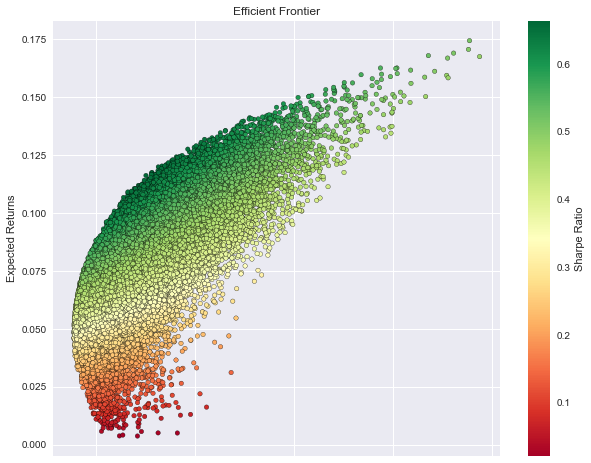

In [32]:
# Plot the efficient frontier, but this time, use a heatmap to colour code
# based on the sharpe ratio...

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns',  c='Sharpe Ratio', 
                cmap='RdYlGn', edgecolors='black', figsize=(10,8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [33]:
# Now, figure out what the max profit is we could get...
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio  = df.loc[df['Sharpe Ratio'] == max_sharpe]

In [34]:
# And figure out the most risk-averse portfolio...
min_volatility = df['Volatility'].min()
min_volatility_portfolio = df.loc[df['Volatility'] ==  min_volatility]

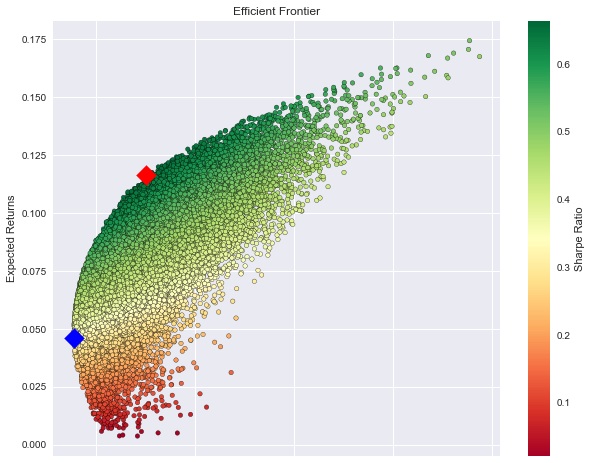

In [38]:
# Now, figure out what the max profit is we could get...
max_sharpe = df['Sharpe Ratio'].max()
sharpe_portfolio  = df.loc[df['Sharpe Ratio'] == max_sharpe]

# And figure out the most risk-averse portfolio...
min_volatility = df['Volatility'].min()
min_volatility_portfolio = df.loc[df['Volatility'] ==  min_volatility]

# Plot these as extra points on the graph...

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns',  c='Sharpe Ratio', 
                cmap='RdYlGn', edgecolors='black', figsize=(10,8), grid=True)

# These are new compared to the previous plot...
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], 
            c='red', marker='D', s=200)

plt.scatter(x=min_volatility_portfolio['Volatility'], 
            y=min_volatility_portfolio['Returns'], 
            c='blue', marker='D', s=200)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

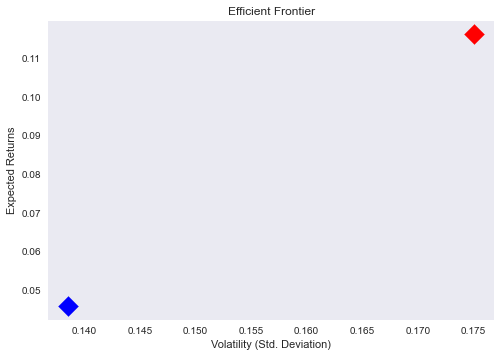

In [39]:
# Finally, to get the specifics of the two portfolios, 
# print them out...

print(min_volatility_portfolio.T*100)
print(sharpe_portfolio.T*100)

                  17879
Returns        4.582751
Volatility    13.855189
Sharpe Ratio  33.076061
CNP Weight    24.032728
F Weight      10.465888
WMT Weight    25.776005
GE Weight      0.148727
TSLA Weight   39.576652
                  31209
Returns       11.614461
Volatility    17.504468
Sharpe Ratio  66.351407
CNP Weight    37.289012
F Weight       0.848195
WMT Weight    40.498721
GE Weight     21.145033
TSLA Weight    0.219038


In [40]:
# Most risk-adverse person would get 4.5% returns, 
# with a calculated volatility of 13.8%.
# The best returns available are 11.6% 
# with a volatility of 17.6%.